In [ ]:
### Quick Install 
# pip install pandasai

## Set up the necessary libraries 

In [1]:
import os
import sys
from dotenv import load_dotenv
from langchain.chat_models import AzureChatOpenAI

load_dotenv()
# Config for Azure OpenAI.
OPENAI_API_TYPE = "azure"
OPENAI_API_BASE = os.getenv("OPENAI_API_BASE")
OPENAI_API_VERSION = "2023-07-01-preview"
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")


llm4 = AzureChatOpenAI(
    openai_api_base= OPENAI_API_BASE,
    openai_api_version= OPENAI_API_VERSION,
    deployment_name="gpt-4-32k",
    temperature=0,
    openai_api_key= OPENAI_API_KEY ,
    openai_api_type = OPENAI_API_TYPE,
)



`PandasAI` is designed to be used in conjunction with pandas. It makes pandas conversational, allowing you to ask questions to your data in natural language.

Queries
For example, you can ask PandasAI to find all the rows in a DataFrame where the value of a column is greater than 5, and it will return a DataFrame containing only those rows:

### Queries
For example, you can ask PandasAI to find all the rows in a DataFrame where the value of a column is greater than 5, and it will return a DataFrame containing only those rows:

In [2]:
import pandas as pd
from pandasai import SmartDataframe

# Sample DataFrame
df = pd.DataFrame({
    "country": ["United States", "United Kingdom", "France", "Germany", "Italy", "Spain", "Canada", "Australia", "Japan", "China"],
    "gdp": [19294482071552, 2891615567872, 2411255037952, 3435817336832, 1745433788416, 1181205135360, 1607402389504, 1490967855104, 4380756541440, 14631844184064],
    "happiness_index": [6.94, 7.16, 6.66, 7.07, 6.38, 6.4, 7.23, 7.22, 5.87, 5.12]
})


df = SmartDataframe(df, config={"llm": llm4})
df.chat('Which are the 5 happiest countries?')

,country,gdp,happiness_index
6,Canada,1607402389504,7.23
7,Australia,1490967855104,7.22
1,United Kingdom,2891615567872,7.16
3,Germany,3435817336832,7.07
0,United States,19294482071552,6.94


We can also ask `PandasAI` to perform more complex queries. For example, you can ask PandasAI to find the sum of the GDPs of the 2 unhappiest countries:

In [3]:
df.chat('What is the sum of the GDPs of the 2 unhappiest countries?')

19012600725504

### Charts
You can also ask PandasAI to draw a graph:

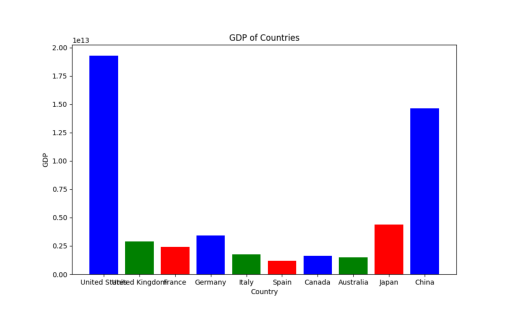

In [4]:
df.chat(
    "Plot the histogram of countries showing for each the gdp, using different colors for each bar",
)

### Multiple DataFrames
Additionally, you can also pass in multiple dataframes to PandasAI and ask questions relating them.

In [5]:
from pandasai import SmartDatalake

employees_data = {
    'EmployeeID': [1, 2, 3, 4, 5],
    'Name': ['John', 'Emma', 'Liam', 'Olivia', 'William'],
    'Department': ['HR', 'Sales', 'IT', 'Marketing', 'Finance']
}

salaries_data = {
    'EmployeeID': [1, 2, 3, 4, 5],
    'Salary': [5000, 6000, 4500, 7000, 5500]
}

employees_df = pd.DataFrame(employees_data)
salaries_df = pd.DataFrame(salaries_data)


dl = SmartDatalake([employees_df, salaries_df], config={"llm": llm4})
dl.chat("Who gets paid the most?")

'Olivia gets paid the most.'

You can find more examples in the [examples](https://github.com/gventuri/pandas-ai/blob/main/examples) directory

### Shortcuts
PandasAI also provides a number of shortcuts (beta) to make it easier to ask questions to your data. For example, you can ask PandasAI to `clean_data`, `impute_missing_values`, `generate_features`, `plot_histogram`, and many many more.

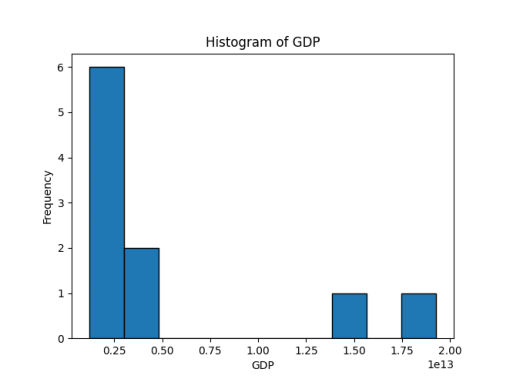

In [6]:
# Clean data
df.clean_data()

# Impute missing values
df.impute_missing_values()

# Generate features
df.generate_features()

# Plot histogram
df.plot_histogram(column="gdp")

Learn more about the shortcuts [here](https://pandas-ai.readthedocs.io/en/latest/shortcuts/).

In [13]:
df = pd.read_table('../data/nyc-parking-violations.tsv')
df.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1361929741,FCJ5493,NY,PAS,12/18/1970,20,SUBN,GMC,S,35030,...,BLACK,0.0,2013,-,0,NaN,NaN,NaN,NaN,NaN
1,1366962000,63540MC,NY,COM,02/02/1971,46,DELV,FRUEH,P,58830,...,BRN,0.0,2013,-,0,NaN,NaN,NaN,NaN,NaN
2,1342296187,GCY4187,NY,SRF,09/18/1971,21,VAN,FORD,S,11790,...,BLUE,0.0,2002,-,0,NaN,NaN,NaN,NaN,NaN
3,1342296199,95V6675,TX,PAS,09/18/1971,21,NaN,GMC,S,11790,...,SILVR,0.0,2008,-,0,NaN,NaN,NaN,NaN,NaN
4,1342296217,FYM5117,NY,SRF,09/18/1971,21,SUBN,NISSA,S,28190,...,WHITE,0.0,2012,-,0,NaN,NaN,NaN,NaN,NaN


In [14]:
df = SmartDataframe(df, config={"llm": llm4})

In [15]:
df.chat(
    """ Data profiling is an important first step in many data analytics efforts.
     Profiling helps users to gain an understanding of the data properties and to uncover data quality flaws
     compute basic statistics such as the number of distinct values, empty values, and data types of the columns.
     """
)

,Column,Distinct Count,Empty Count,Data Type
0,Summons Number,10000,0,int64
1,Plate ID,8913,0,object
2,Registration State,54,0,object
3,Plate Type,25,0,object
4,Issue Date,1097,0,object
5,Violation Code,80,0,int64
6,Vehicle Body Type,108,369,object
7,Vehicle Make,254,526,object
8,Issuing Agency,12,0,object
9,Street Code1,1606,0,int64


In [17]:
df.chat("Print the minimum and maximum value for column 'Issue Date'") 


'The minimum issue date is 1970-12-18 00:00:00 and the maximum issue date is 2013-07-29 00:00:00.'

In [18]:
df.chat("Print the minimum and maximum value for column Vehicle Year") 

'The minimum vehicle year is 0 and the maximum vehicle year is 2066.'

In [19]:
df.chat("Print the most frequent values in column 'Violation Time'")

,Violation Time
0830A,35
0945A,34
0950A,34
0440P,31
0405P,31


In [20]:
# Get set of distinct values for column 'Registration State'. Print the
# values in decreasing order of frequency.

df.chat(
        """ Get set of distinct values for column 'Registration State'. Print the values in decreasing order of frequency.
        Print the minimum and maximum value for column Vehicle Year """
        ) 

,Registration State Frequency,Minimum Vehicle Year,Maximum Vehicle Year
NY,7441,0,2066
NJ,961,0,2066
99,355,0,2066
PA,242,0,2066
FL,129,0,2066
CT,108,0,2066
MA,100,0,2066
VA,71,0,2066
AZ,54,0,2066
MD,46,0,2066


In [21]:
df.chat(
        "print the schema of the dataframe"
        ) 

,Column Name,Data Type
0,Summons Number,int64
1,Plate ID,object
2,Registration State,object
3,Plate Type,object
4,Issue Date,object
5,Violation Code,int64
6,Vehicle Body Type,object
7,Vehicle Make,object
8,Issuing Agency,object
9,Street Code1,int64
